![logo](imagen/LOGOUPS.png)

<font size="4"><strong>ESTUDIANTE:</strong> Martin Bojorque, Ivan Ulloa<br><strong>ASIGNATURA:</strong> Aprendizaje de Máquina</font>

# PRÁCTICA MAQUINAS DE SOPORTE VECTORIAL (SVM)

## Descripción del Dataset 

<font size="4">Número de instancias: 
    <br>Descripción: Intereses de personas en una encuesta de varias preguntas de si o no.
    <br>Dataset tomado de: https://www.kaggle.com/rainbowgirl/clustering-categorical-peoples-interests
    <br>Atributos: 6340<br>
    <br>Existen 4 gupos a los que se les hace 217 preguntas de acuerdo a sus intereses, preguntas como por ejemplo: ¿Le gusta  el ajedrez? ¿Le gusta la playa?<br><br>
    <strong>1. </strong>Interes 01 (Categorico nominal) (Numérico discreto)<br>
    <strong>(...) </strong><br>
    <strong>217. </strong>Interes 217 (Categorico nominal) (Numérico discreto)<br>
    <br>
</font>

##  CARGA DE DATASET

In [ ]:
from tensorflow.keras.datasets import mnist
import math, time 
import matplotlib.pyplot as plt
import numpy as np 
#!pip install seaborn
import seaborn as sns
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv('kaggle_Interests_group.csv', delimiter=';')
df.fillna(0, inplace=True)
#df = df[:2000]
df.head() 

,group,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,interest9,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,C,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
df.describe()

,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,interest9,interest10,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
count,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,...,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000,6340.000000
mean,0.156625,0.000158,0.005521,0.003943,0.126025,0.535647,0.000158,0.014669,0.052681,0.000158,...,0.018770,0.017350,0.794953,0.390536,0.138644,0.000315,0.011356,0.779811,0.640221,0.023186
std,0.363475,0.012559,0.074101,0.062676,0.332379,0.499399,0.012559,0.120233,0.224119,0.012559,...,0.136879,0.130583,0.404938,0.488555,0.346513,0.017760,0.105968,0.414787,0.480302,0.150506
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,...,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000


In [ ]:
#DIVISION EN: X VARIABLES (VALORES DE CADA PIXEL ENTRE 0-255), Y SALIDA (10 CATEGORIAS -> NUMEROS ENTRE 0-9)
X_tr = df.iloc[:,1:] # iloc ensures X_tr will be a dataframe
y_tr = df.iloc[:, 0]
print("X_tr shape",X_tr.shape)
print("y_tr shape",y_tr.shape)

X_tr shape (6340, 217)
y_tr shape (6340,)


In [ ]:
#SPLIT EN TRAIN Y TEST
#(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train, X_test, y_train, y_test = train_test_split(X_tr,y_tr,test_size=0.2, random_state=42)
#random_state: permite que siempre tengamos las mismas particiones, de tal manera que los resultados se puedan reproducir
#stratify=y permite preservar la distribución de las etiquetas (los números)

In [ ]:
X_train.shape

(5072, 217)

In [ ]:
X_test.shape

(1268, 217)

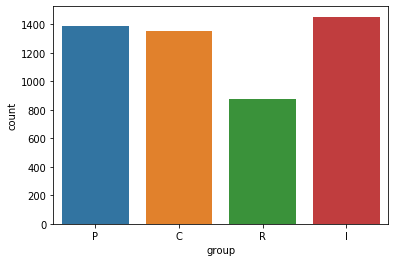

In [ ]:
sns.countplot(y_train)

##  DISEÑO DE SVM

In [ ]:
from sklearn.svm import SVC
print('SVM Classifier with gamma = 0.1; Kernel = Polynomial')
classifier = SVC(gamma=0.1, kernel='poly', C=1.0, random_state = 0, verbose=True)

#from sklearn.svm import SVR
#sv_regressor = SVR(kernel='linear', C=1.0, epsilon=0.1)

#kernels: "linear", "poly", "rbf" y "sigmoid"

#parametros(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
#    decision_function_shape='ovr', degree=3, gamma=10, kernel='poly',
#    max_iter=-1, probability=False, random_state=None, shrinking=True,
#    tol=0.001, verbose=False)

SVM Classifier with gamma = 0.1; Kernel = Polynomial


##  <span style="color:BLUE">FASE DE ENTRENAMIENTO</span>

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import zero_one_loss
from time import process_time 

column_names = ['kernel', 'C','accuracy', 'error', 'tiempo_ejecucion']
df_info = pd.DataFrame(columns = column_names)

In [ ]:
c=0.0001
g=0.1
for x in range(5):
    classifier = SVC(gamma=g, kernel='linear', C=c, random_state = 0, verbose=True)
    t1_start = process_time()  
    classifier.fit(X_train,y_train)
    t1_stop = process_time()
    t1_total = t1_stop-t1_start
    
    y_pred = classifier.predict(X_test)
    model_acc = classifier.score(X_test, y_test)
    test_acc_svm = accuracy_score(y_test, y_pred)
    acc_svm = round(test_acc_svm, 4)
    error_rate_svm = zero_one_loss(y_test,y_pred)
    error_rate_svm=round(error_rate_svm, 4)
    new_row = {'kernel':'linear', 'C':c, 'accuracy':acc_svm, 'error':error_rate_svm, 'tiempo_ejecucion':t1_total}
    df_info = df_info.append(new_row, ignore_index=True)
    c=c*10

c=0.0001
for x in range(5):
    classifier = SVC(gamma=g, kernel='poly', C=c, random_state = 0, verbose=True)
    t1_start = process_time()  
    classifier.fit(X_train,y_train)
    t1_stop = process_time()
    t1_total = t1_stop-t1_start
    
    y_pred = classifier.predict(X_test)
    model_acc = classifier.score(X_test, y_test)
    test_acc_svm = accuracy_score(y_test, y_pred)
    acc_svm = round(test_acc_svm, 4)
    error_rate_svm = zero_one_loss(y_test,y_pred)
    error_rate_svm=round(error_rate_svm, 4)
    new_row = {'kernel':'poly', 'C':c, 'accuracy':acc_svm, 'error':error_rate_svm, 'tiempo_ejecucion':t1_total}
    df_info = df_info.append(new_row, ignore_index=True)
    c=c*10

c=0.0001
for x in range(5):
    classifier = SVC(gamma=g, kernel='rbf', C=c, random_state = 0, verbose=True)
    t1_start = process_time()  
    classifier.fit(X_train,y_train)
    t1_stop = process_time()
    t1_total = round(t1_stop-t1_start)
    
    y_pred = classifier.predict(X_test)
    model_acc = classifier.score(X_test, y_test)
    test_acc_svm = accuracy_score(y_test, y_pred)
    acc_svm = round(test_acc_svm, 4)
    error_rate_svm = zero_one_loss(y_test,y_pred)
    error_rate_svm=round(error_rate_svm, 4)
    new_row = {'kernel':'rbf', 'C':c, 'accuracy':acc_svm, 'error':error_rate_svm, 'tiempo_ejecucion':t1_total}
    df_info = df_info.append(new_row, ignore_index=True)
    c=c*10
    #g=g*10
    
c=0.0001
for x in range(5):
    classifier = SVC(gamma=g, kernel='sigmoid', C=c, random_state = 0, verbose=True)
    t1_start = process_time()  
    classifier.fit(X_train,y_train)
    t1_stop = process_time()
    t1_total = round(t1_stop-t1_start)
    
    y_pred = classifier.predict(X_test)
    model_acc = classifier.score(X_test, y_test)
    test_acc_svm = accuracy_score(y_test, y_pred)
    acc_svm = round(test_acc_svm, 4)
    error_rate_svm = zero_one_loss(y_test,y_pred)
    error_rate_svm=round(error_rate_svm, 4)
    new_row = {'kernel':'sigmoid', 'C':c, 'accuracy':acc_svm, 'error':error_rate_svm, 'tiempo_ejecucion':t1_total}
    df_info = df_info.append(new_row, ignore_index=True)
    c=c*10

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

In [ ]:
df_info

,kernel,C,accuracy,error,gamma,tiempo_ejecucion
0,linear,0.01,0.5710,0.4290,0.1,8.875000
1,linear,0.10,0.5836,0.4164,0.1,7.562500
2,linear,1.00,0.5710,0.4290,0.1,9.421875
3,poly,0.01,0.5639,0.4361,0.1,8.421875
4,poly,0.10,0.5536,0.4464,0.1,8.687500
5,poly,1.00,0.5205,0.4795,0.1,10.406250
6,poly,10.00,0.5221,0.4779,0.1,10.015625
7,poly,100.00,0.4921,0.5079,0.1,9.609375
8,rbf,0.01,0.2808,0.7192,0.1,13.000000
9,rbf,0.10,0.5457,0.4543,0.1,12.000000


In [ ]:
valoresK=[0.01,0.1,1]
Nmin=40
Nmax=100
dataResultados=dataResultados.loc[(dataResultados['accuracy'] >= Nmin) & (dataResultados['accuracy'] <= Nmax)]#Filtrar por algunos valores de N
dataResultados=dataResultados.loc[(dataResultados['C'].isin(valoresK))]#Filtrar por algunos valores en K

#Escribir dataframe en un archivo csv
dataResultados.to_csv("Datasets/ResultadosFiltrados.csv", sep=";",index = False) #sep es el separado, por defector es ","

dataResultados.head()

##  GRAFICAS

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


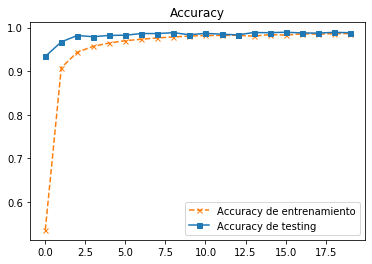

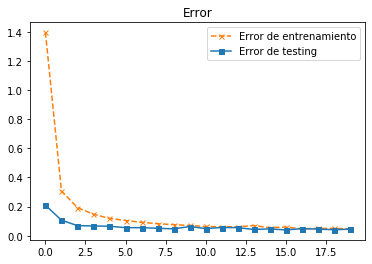

In [ ]:
print(h.history.keys())
accuracy = h.history['accuracy']
val_accuracy = h.history['val_accuracy']
loss = h.history['loss']
val_loss = h.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', marker='x', linestyle='--', color='C1', ms=5, label='Accuracy de entrenamiento')
plt.plot(epochs, val_accuracy, 'b', marker='s', linestyle='-', color='C0', ms=5, label='Accuracy de testing')
plt.title('Accuracy')
plt.legend()
plt.show()
plt.figure()
plt.plot(epochs, loss, 'bo', marker='x', linestyle='--', color='C1', ms=5, label='Error de entrenamiento')
plt.plot(epochs, val_loss, 'b', marker='s', linestyle='-', color='C0', ms=5, label='Error de testing')
plt.title('Error')
plt.legend()
plt.show()